x0: 1.5
y0: 1


/var/folders/4g/bbm0gjv155936xsdg_41_4080000gn/T/ipykernel_46758/3729696895.py:61: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, dY, levels=[0], colors="red", label='y-nullcline')
/var/folders/4g/bbm0gjv155936xsdg_41_4080000gn/T/ipykernel_46758/3729696895.py:62: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, dX, levels=[0], colors="blue", label='x-nullcline')


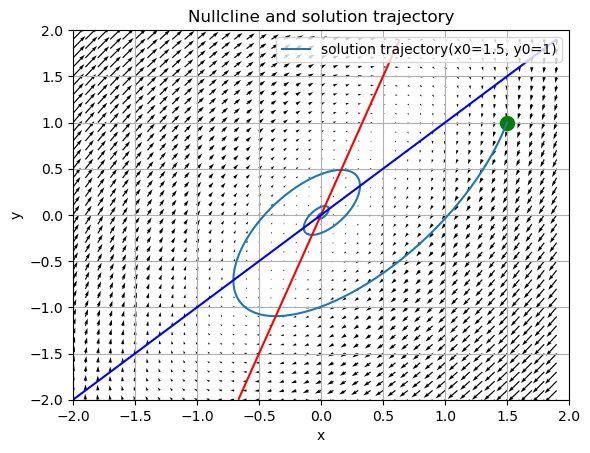

In [58]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

a = -2
b = 2
c = -3
d = 1

def dx(x, y):
    return a*x + b*y

def dy(x, y):
    return c*x + d*y

def vector(state, t):
    x, y = state
    nextx = dx(x,y)
    nexty = dy(x,y)
    return nextx, nexty

def plot_trajectory(x0, y0):
    t = np.arange(0.0, 10.0, 0.01)
    v = integrate.odeint(vector, [x0, y0], t)
    x_vec = v[:,0] 
    y_vec = v[:,1]
    
    # plt.figure(figsize=(10, 8))
    
    # 解軌道の描画
    plt.plot(x0, y0, marker='o', markersize=10, color='green')  # 初期値のみ強調表示
    plt.plot(x_vec, y_vec, label=f'solution trajectory(x0={x0}, y0={y0})')
    
    # ベクトル場の描画
    plot_vector_field(x_vec, y_vec)
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Nullcline and solution trajectory")
    plt.grid()
    plt.legend()
    plt.show()

def plot_vector_field(x_vec, y_vec):
    """
    p = 1.0
    xmax, xmin = max(x_vec.max() + p, 2), min(x_vec.min() - p, -2)
    ymax, ymin = max(y_vec.max() + p, 2), min(y_vec.min() - p, -2)
    """

    xmax, xmin = 2, -2
    ymax, ymin = 2, -2
    X, Y = np.meshgrid(np.arange(xmin, xmax, 0.1), np.arange(ymin, ymax, 0.1))
    dX = dx(X, Y)
    dY = dy(X, Y)
    plt.quiver(X, Y, dX, dY)

    plt.contour(X, Y, dY, levels=[0], colors="red", label='y-nullcline')
    plt.contour(X, Y, dX, levels=[0], colors="blue", label='x-nullcline')
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])

# 初期値を入力
x0 = 1.5
y0 = 1

# 解軌道を表示
print(f'x0: {x0}')
print(f'y0: {y0}')
plot_trajectory(x0, y0)

x0: -1
y0: 0.5


/var/folders/4g/bbm0gjv155936xsdg_41_4080000gn/T/ipykernel_46758/638873656.py:56: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, dY, levels=[0], colors="red", label='y-nullcline')
/var/folders/4g/bbm0gjv155936xsdg_41_4080000gn/T/ipykernel_46758/638873656.py:57: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, dX, levels=[0], colors="blue", label='x-nullcline')


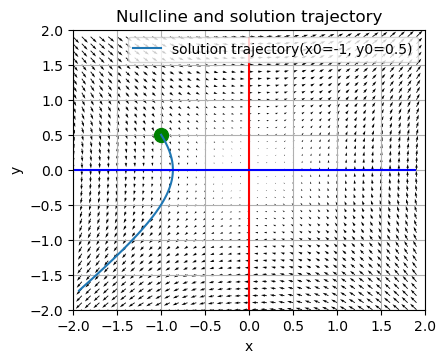

x0: 0.5
y0: 1


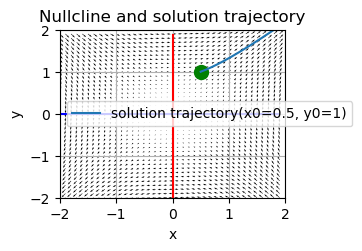

x0: 1
y0: -0.05


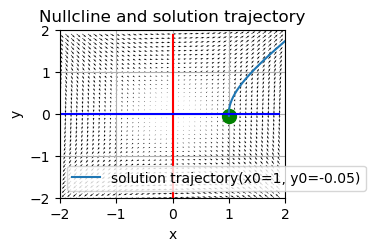

x0: 0.5
y0: 0.5


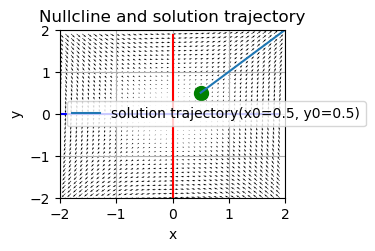

<Figure size 640x480 with 0 Axes>

In [37]:
# 複数の初期値を設定
initial_conditions = [(-1, 0.5), (0.5, 1), (1, -0.05), (0.5, 0.5)]

rows = 2
cols = 2

# 全体の図のサイズを設定
plt.figure(figsize=(5*cols, 4*rows))

# 各初期値に対して解軌道を表示
for i, (x0, y0) in enumerate(initial_conditions):
    plt.subplot(rows, cols, i+1)
    print(f'x0: {x0}')
    print(f'y0: {y0}')
    plot_trajectory(x0, y0)

# サブプロット間の間隔を調整
plt.tight_layout()
plt.show()

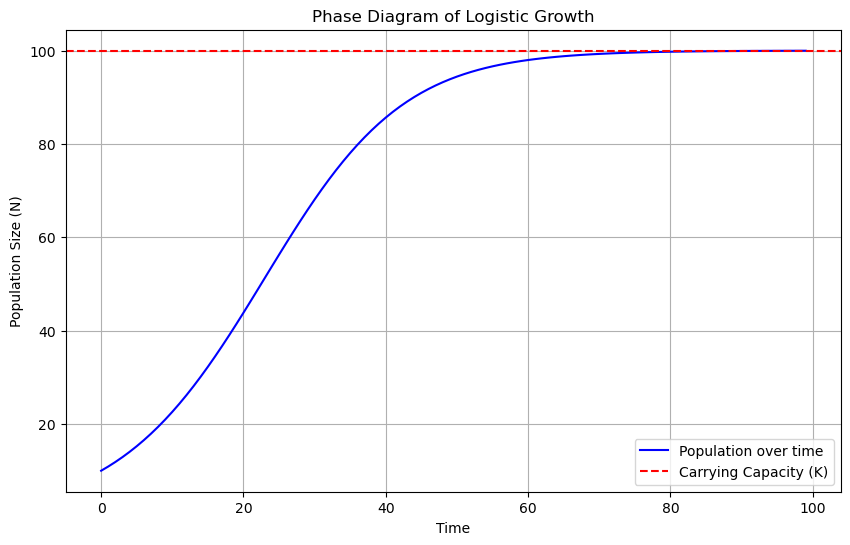

In [8]:
import matplotlib.pyplot as plt

# ロジスティック方程式の導関数
def dN_dt(N, r, K):
    return r * N * (1 - N / K)

# オイラー法による数値解法
def euler_method(r, K, N0, t_end, dt):
    t_values = []
    N_values = []
    
    N = N0
    t = 0
    
    while t < t_end:
        t_values.append(t)
        N_values.append(N)
        
        # オイラー法の更新
        N += dN_dt(N, r, K) * dt
        t += dt
    
    return t_values, N_values

# 相図を描画する関数
def plot_phase_diagram(r, K, N0, t_end, dt):
    t_values, N_values = euler_method(r, K, N0, t_end, dt)
    
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, N_values, label='Population over time', color='blue')
    plt.title('Phase Diagram of Logistic Growth')
    plt.xlabel('Time')
    plt.ylabel('Population Size (N)')
    plt.axhline(y=K, color='red', linestyle='--', label='Carrying Capacity (K)')
    plt.legend()
    plt.grid()
    plt.show()

# パラメータ設定
r = 0.1  # 成長率
K = 100  # 環境収容力
N0 = 10  # 初期個体数
t_end = 100  # 終了時間
dt = 1  # 刻み幅

# 相図を描画
plot_phase_diagram(r, K, N0, t_end, dt)
